<a href="https://colab.research.google.com/github/OlegKov33/Big-Data-Analytics-Coursework/blob/main/Big_Data_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oleg Kovalchuk (2106398) Big Data Analytics Coursework
---
Part 1: Introduction
---
**The dataset is called: “Suicide Attempts in Shandong, China”, source kaggle.com.**
**The dataset was obtained: 25/10/2023, 08:48**
I chose that dataset because I was confident it wouldn’t be picked during lectures, and I have interest in the subject area.
>
The dataset contains records of people from China that has attempted to commit suicide. The aim is to train an algorithm that would predict if the person died or not the most accurate.
>
The dataset will be used to train different models to accurately predict if a person has died or not. The purpose is to get good accuracy in prediction.
>
The paper that I choose addresses the same topic of suicide that I choose but with a difference, I look at if person died or not whereas paper looks at changes over a period of time, gender and the cause of that change. The paper states that the suicide rates dropped by 65% "The overall suicide rate in China decreased from 20.9/100,000 in 1990 to 7.2 in 2017”. Reason for such is "negatively correlated with GDP per capita, population density, and life expectancy, but positively related to rural population density."
>
The paper states that in over decades things like life expectancy, economy, ability to cope and social values all have improved therefore reducing rates. The problem that the paper is trying to solve is to inform reader about Chinas improvement in suicide rates, Standard Deviation was used to show decrease in value between 1990-2017. I think the paper was able to show and explain the information about China, its suicide rates, the reason for them to occur and how they improved over time. The paper used Standard deviation whereas I used Random Forest classification/regression, Decision trees and logical regression.


### Part 1: Data exploration
---
In the section below you can see dataset being loaded, and explored.
1. First step is to check for any null values and what fields are there. I used **print** and **df.info()**
2. In second step I tried to see how diverse the dataset is. with **plt.subplot** and various **plot** functions


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB
The dataset valuesNone


<Axes: xlabel='Month'>

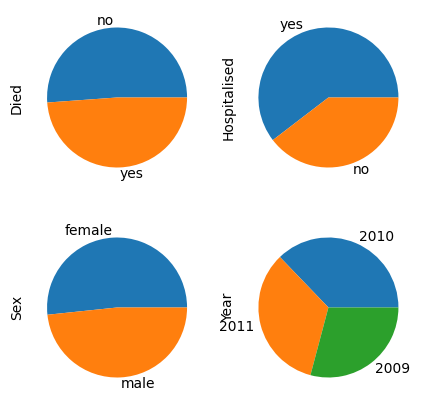

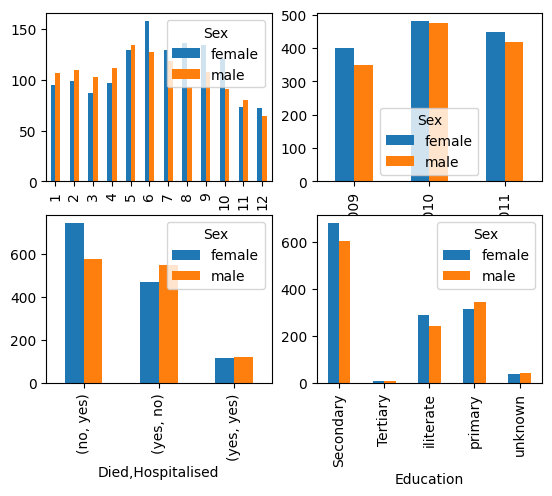

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# dataset should be placed in sample_data folder
df = pd.read_csv("/content/sample_data/SuicideChina.csv")
test_df = df

#print(df.head()) # head() shows data, print isnt really needed

#verbose=True - makes it more readable, changing to False will give you fewer lines.
print(f"The dataset values{df.info(verbose=True)}")



plt.figure(figsize=(20,15))
# subplot(2,2) - means you will make 4 plots, (3,2) means you can do 6 plots
''' Example: (2,2)
Plot(1) Plot(2)
Plot(3) Plot(4)
'''

plt.subplot(2,2,1)
#counts all values in Died field and separates into yes and no, making almost 50% be in each gender
temp = df.Died.value_counts()
plot = temp.plot.pie(y='Died', figsize=(5,5))

plt.subplot(2,2,2)
#counts all values in Hospitalised field and separates into yes and no
temp2 = df.Hospitalised.value_counts()
plot = temp2.plot.pie(y='Hospitalised', figsize=(5, 5))

plt.subplot(2,2,3)
# counts all value in Sex and separates into male and female
temp3 = df.Sex.value_counts()
plot = temp3.plot.pie(y='Gender', figsize=(5, 5))

plt.subplot(2,2,4)
#counts all values in Year and separates records into 2009, 2010, 2011
temp4 = df.Year.value_counts()
plot = temp4.plot.pie(y='Year', figsize=(5, 5))


fig, axes = plt.subplots(nrows=2, ncols=2)
t2 = df
t2=t2.groupby(['Education','Sex']).size()
t2=t2.unstack()
t2.plot(kind='bar',ax=axes[1,1])


# This thing shows persons gender and IF they died/were hospitalised (no/yes, yes/no, yes/yes)
t2 = df
t2=t2.groupby(['Died','Hospitalised','Sex']).size()
t2=t2.unstack()
t2.plot(kind='bar',ax=axes[1,0])

t2 = df
t2=t2.groupby(['Year','Sex']).size()
t2=t2.unstack()
t2.plot(kind='bar',ax=axes[0,1])

t2 = df
t2=t2.groupby(['Month','Sex']).size()
t2=t2.unstack()
t2.plot(kind='bar',ax=axes[0,0])

In the charts above you can observe the following:
1. Pie chart
* Ratio of how many people died
* Ratio of how many people got hospitalised
* Ratio of how many male/female there are
* Ratio of how many cases were reported in each year
---
2. Bar chart
* In which month was there most of suiside cases recorded
* In which year which gender commited more attempts
* Which gender died/ got hospitalised e.g.(no/yes) > lived/got hospitalised
* Which gender has what education level

Bar chart was focused on seeing how normalized the data is. The plts showed simiarity between male and female concluding that the dataset is good to go and doesnt have missing values.

###Part 1: Data preparation
---
In this part the dataset will be changed into a different format, a few fields will be changed from (yes, no) into binary (1, 0). The field **Died_no** is the reverse of what I am trying to predict, so I dropped it to prevent 100% accuracy.

I changed original datset **df** into **test_df** and **test2_df** datasets for further testing, **test2_df** has fewer fields because I want to see it makes any difference to algorithm accuracy later on

In [ ]:
from sklearn.model_selection import train_test_split

# Theses variables will be dropped
cat_variables = ['Hospitalised','Died','Urban','Sex',"Education","Occupation","method"]
test_df = df.drop(cat_variables, axis=1)

# Theses variables will be changed into separate fields and added back to test_df dataset
a = pd.get_dummies(df['Hospitalised'], prefix = "Hospitalised")
b = pd.get_dummies(df['Died'], prefix = "Died")
c = pd.get_dummies(df['Urban'], prefix = "Urban")
d = pd.get_dummies(df['Sex'], prefix = "Sex")
e = pd.get_dummies(df['Education'], prefix = "Education")
f = pd.get_dummies(df['Occupation'], prefix = "Occupation")
g = pd.get_dummies(df['method'], prefix = "method")


# Here we are combining all fields in df_tmp into 1 dataset (test_df)
df_tmp = [test_df, a, b, c,d,e,f,g]
test_df = pd.concat(df_tmp, axis = 1)
test_df=test_df.drop("Died_no",axis=1) # This is the opposite of what we are trying to predict so we need to remove it to prevent 100% error


# Same as above but some fields will be dropped for testing purpose later on in (test2_df) dataset
verr = ['Hospitalised','Died','Urban','Sex',"Education","Occupation","method"]
test2_df = df.drop(verr, axis=1)
a1 = pd.get_dummies(df['Hospitalised'], prefix = "Hospitalised")
a2 = pd.get_dummies(df['Died'], prefix = "Died")
a3 = pd.get_dummies(df['Sex'], prefix = "Sex")
df_tmp = [test2_df, a1, a2,a3]

test2_df = pd.concat(df_tmp, axis = 1)
test2_df=test2_df.drop("Died_no",axis=1)

# making sure the data is in a format we need it to be in
test_df.head()

,Unnamed: 0,Person_ID,Year,Month,Age,Hospitalised_no,Hospitalised_yes,Died_yes,Urban_no,Urban_unknown,...,Occupation_worker,method_Cutting,method_Drowning,method_Hanging,method_Jumping,method_Other poison,method_Others,method_Pesticide,method_Poison unspec,method_unspecified
0,1,1,2010,12,39,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2,2009,3,83,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,3,2010,2,60,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,4,4,2011,1,73,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,5,5,2009,8,51,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Part 2: Training and documenting
---
In this part I will be training model 4 different models on 2 different datasets, to determine if one is more usable than the other and if dropping fields helped to improve the results. I have divided the dataset into train and test inside **startTrain** function below.


In [ ]:
# MUST imports for machine learning to work
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

# size -  how much test data will you have (0.3) 30%
# est -   number of trees you want to build(100) 100 trees
# state - randomes of trees (15)
# iter -  how many times you want to run the algorith(3000) 3000 times

def startTrain(test_df, size, est, state, iter):

  con = "Died_yes" # this is what we are trying to predict (y or label)

  # for X - we remove label and for Y - we remove X
  X = test_df.drop(con,axis = 1)
  y = test_df[con]

  # assign test and train variables with function train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size,random_state=0)

  allAlgorithmsUsed = [RandomForestRegressor(),
                     RandomForestClassifier(n_estimators = est),
                     DecisionTreeClassifier(random_state=state),
                     LogisticRegression(solver='lbfgs',max_iter=iter)]

  # This loop goes over all algorits and trains them on X_train Y_train data and shows how well each preforomed with given data
  for i in allAlgorithmsUsed:
    i.fit(X_train,y_train)
    print(f"The model {i}, got {round(i.score(X_test,y_test)*100,2)}%")
  print("\n")

# This shows you difference between test_df and test2_df in accuracy
print(startTrain(test_df, 0.2, 100, 15, 3000))
print("\n ----------------- \n")
print(startTrain(test2_df, 0.2, 100, 15, 3000))
print(startTrain(test2_df, 0.2, 100, 15, 3000))
#ADD explanations to hwat is happening ,add visualization AND FINISH IT


The model RandomForestRegressor(), got 67.03%
The model RandomForestClassifier(), got 89.71%
The model DecisionTreeClassifier(random_state=15), got 83.88%
The model LogisticRegression(max_iter=3000), got 88.93%


None

 ----------------- 

The model RandomForestRegressor(), got 60.73%
The model RandomForestClassifier(), got 87.77%
The model DecisionTreeClassifier(random_state=15), got 84.85%
The model LogisticRegression(max_iter=3000), got 87.77%


None
The model RandomForestRegressor(), got 60.76%
The model RandomForestClassifier(), got 87.57%
The model DecisionTreeClassifier(random_state=15), got 84.85%
The model LogisticRegression(max_iter=3000), got 87.77%


None


The output shows that:
* Random Forest Regression score was within (60.16 - 60.9)
* Random Forest Classifier score was within (87.57 - 89.9)
* Decision Tree Classifier score was within (83.88 - 84.85)
* Logistic Regression score was within (88.77 - 88.93)
---
This shows that RFR prefformed the poorest out of all, RFC did well but prefformend worse with **test2_df** with dropped columns and LR but DTC prefformed better with dropped variable columns. And DT in **test2_df** was better than **test_df** which showed that it preformed better with less columns.
>
>
The result of dropping fieilds (Urban, Educatio, Occupation and method) decreased the accuracy of **test2_df** when comparing with **test_df** for the majority.

### Improvement attempt
For improvment I tried to increase parameteres such as more test data, more forests, more randomnes, and more iterations. Here is code examples:


```
#Before improvment
print(startTrain(test_df, 0.2, 100, 15, 3000))

#After imporvment
print(startTrain(test_df, 0.3, 150, 20, 3500))
```


In [ ]:
#Improvment attempt code

print(startTrain(test_df, 0.3, 150, 20, 3500))

print(startTrain(test2_df, 0.3, 150, 20, 3500))

The model RandomForestRegressor(), got 71.36%
The model RandomForestClassifier(n_estimators=150), got 91.71%
The model DecisionTreeClassifier(random_state=20), got 87.56%
The model LogisticRegression(max_iter=3500), got 90.67%


None
The model RandomForestRegressor(), got 65.86%
The model RandomForestClassifier(n_estimators=150), got 88.99%
The model DecisionTreeClassifier(random_state=20), got 85.36%
The model LogisticRegression(max_iter=3500), got 89.38%


None


#Links to paper and the dataset

---
Paper

https://www.sciencedirect.com/science/article/pii/S0165032721013768#:~:text=The%20overall%20suicide%20rate%20in,each%20of%20the%2033%20provinces

---
Dataset

https://www.kaggle.com/datasets/utkarshx27/suicide-attempts-in-shandong-china/

---
Github link


